# *EDA To Prediction (DieTanic)

> ### *Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.* -Lisa Kleypas

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name **DieTanic**. This is a very unforgetable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under ther ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.

The Objective of this notebook is to give an **idea how is the workflow in any predictive modeling problem**. How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.

If You Like the note book and think that it helped you..**PLEASE UPVOTE**. It will keep me motivated.

***
#### *Exploratory Data Analysis(탐색적 데이터 분석) *

# *EDA To Prediction (DieTanic)

> ### *때때로 인생은 가장 어려운 시기에 우리가 항상 원했던 것을 주는 잔인한 유머감각을 가진다.* -Lisa Kleypas

타이타닉 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다. 1912 년 4 월 15 일, 첫 여행 중에 타이타닉은 빙산과 충돌하여 침몰하여 2224 명의 승객과 승무원 중 1502 명이 사망했습니다. 그것이 다이타닉이라는 이름의 이유입니다. 이것은 세상 어느 누구도 잊을 수없는 잊을 수없는 재앙입니다.

타이타닉을 만드는 데 약 750 만 달러가 들었으며 충돌로 인해 바다에서 침몰했습니다. 타이타닉 데이터 셋은 초보자가 데이터 분석 여행을 시작하고 캐글 경쟁에 참여할 수있는 매우 훌륭한 데이터 셋입니다.

이 문서의 목표는 ** 예측 모델링 문제에서 워크 플로가 어떻게 진행되는지 ** 아이디어를 제공하는 것입니다. 기능을 확인하는 방법, 새로운 기능 및 기계 학습 개념을 추가하는 방법 초보자도 문서의 모든 단계를 이해할 수 있도록 문서를 최대한 기본으로 유지하려고 노력했습니다.


***
#### *Exploratory Data Analysis(탐색적 데이터 분석) *

## Contents of the Notebook:

**Part1: Exploratory Data Analysis(EDA):**  
1)Analysis of the features.  
2)Finding any relations or trends considering multiple features.  

**Part2: Feature Engineering and Data Cleaning:**  
1)Adding any few features.  
2)Removing redundant features.  
3)Converting features into suitable form for modeling.  

**Part3: Predictive Modeling**  
1)Running Basic Algorithms.  
2)Cross Validation.  
3)Ensembling.  
4)Important Features Extraction.

## 목차

**가: 탐색적 데이터 분석(EDA):**  
1)특성 분석  
2)여러 개의 특성을 고려한 관계 혹은 경향 파악  

**나: 특성 설계 및 제작과 데이터 정리:**  
1)몇 개의 특성 추가  
2)중복 특성 제거  
3)특성을 모델링에 적합한 형태로 변환  

**다: 예측 모델링**  
1)기본 알고리즘으로 실행  
2)교차 검증  
3)조화/통일  
4)중요한 특징 추출

## Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null value. I will try to fix them.

#### How many Survived??

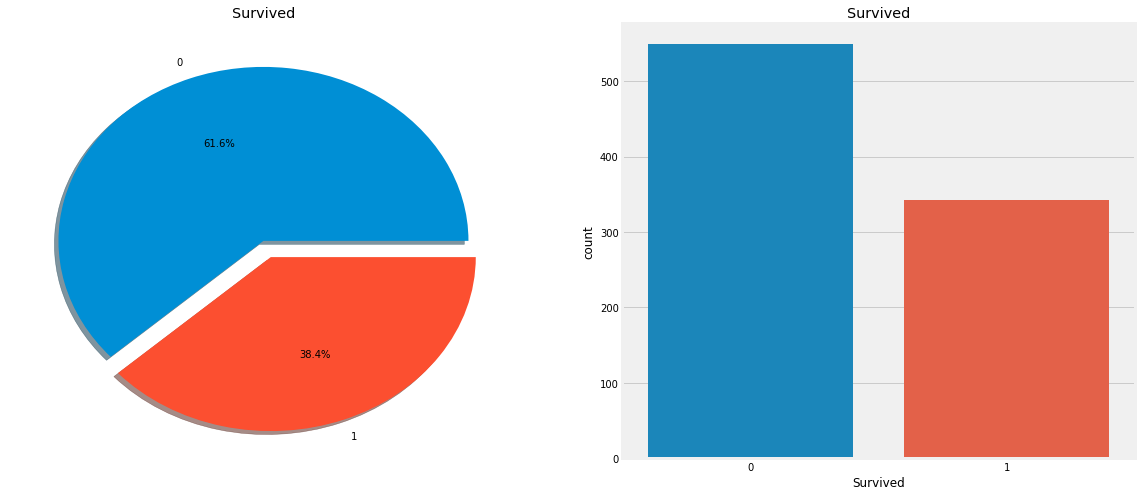

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.  

Out of 891 passengers in traning set, only around 350 survived i.e Only 38.4% of the total training set survived the crash.  We need to dig down more to get better insights from the data and see which categories of the passengers did servive and who didn't.  

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Part Of Embarcation, Age,etc.

First let us understand the different types of features.

사고로 살아남은 승객은 많지 않은 것이 분명하다.

트레이닝 세트에 있는 891명의 승객 중 약 350명만이 생존했다. 즉 전체 훈련 세트의 38.4% 만이 충돌에서 살아남았다. 우리는 승객의 어떤 부류가 살아남고 살아남지 못했는지 알 수 있는 데이터로부터 더 나은 이해를 위해 더 많은 것을 파헤쳐야 한다.

데이터 세트의 서로 다른 특성들에 따른 생존율을 확인하자. 특성은 성별, 부의 일부, 나이 등을 말한다.

먼저 이러한 다양한 유형의 특성들에 대해 이해해야 한다.

## Types Of Features

### Categorical Features:  
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.  

**Categorical Features in the dataset: Sex, Embarked.**

### Ordinal Feature:  
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short,** then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: PClass**

### Continous Feature:  
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.  

**Continous Features in the dataset: Age**

## 특성의 종류
### 범주형 특성 :
범주형 변수는 두 개 이상의 범주를 가진 변수로서, 해당 특성의 각 값은 범주별로 분류할 수 있다. 예를 들어 성별은 두 개의 범주(남성과 여성)를 갖는 범주형 변수다. 이제 우리는 그러한 변수들에 대해 정렬을 할 수도 다른 어떤 주문도 할 수 없다. 그들은 **명목 변수**라고도 한다.

**데이터 세트의 범주형 특성 : 성별, 착수.**

### 순서형 특성 :
순서형 변수는 범주형과 비슷하지만 그 차이점은 값 사이의 상대적 순서를 갖거나 또는 정렬이 가능하다는 것입니다. 예를 들어, **긴, 중간, 짧음** 값을 가진 **Height**와 같은 특성이 있으면 Height는 순서형 변수다. 여기서 변수에서 상대적인 정렬을 할 수 있다.

**데이터 세트의 순서형 특성 : PClass(승객 좌석 혹은 룸 등급)**

### 연속적 특성 :
특성의 열 중 최소값과 최대값 사잇값 혹은 어느 두 지점 사잇값을 가질 수 있으면 연속적 특성이라고 한다.

**데이터 세트의 연속적 특성 : 나이**

### Analysis The Features
### 특성 분석

### Sex --> Categorical Feature
### 성 --> 범주형 특성

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

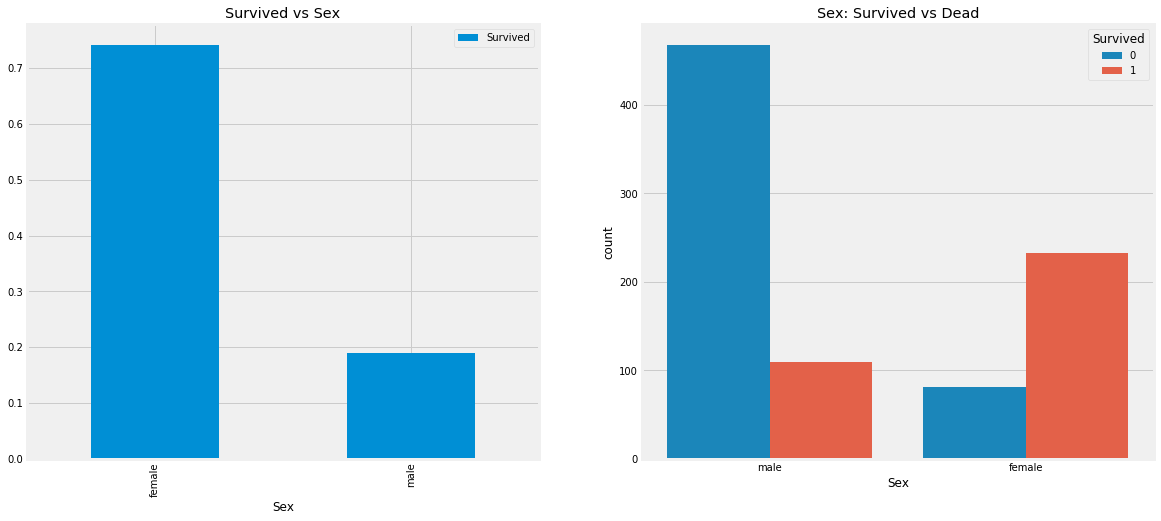

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survived rates for a **women on the ship is around 75% while that for men in around 18-19%**.

This looks to be a **very important** feature for modeling. But is it the best? Lets check other features.

흥미로운 결과를 볼 수 있다. 배에 타고 있는 남성은 여성보다 훨씬 많다. 그럼에도 불구하고 살아남은 여성은 살아남은 남성의 거의 두 배다. 배에 탄 **여성의 생존율은 약 75%인데 반해 남성은 약 18-19%**이다.

이것은 모델링을 위한 **매우 중요한** 특징으로 보인다. 하지만 이게 최고일까? 다른 특성을 확인해보자.

### Pclass --> Ordinal Feature
### 승객 등급 --> 순서형 특성

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


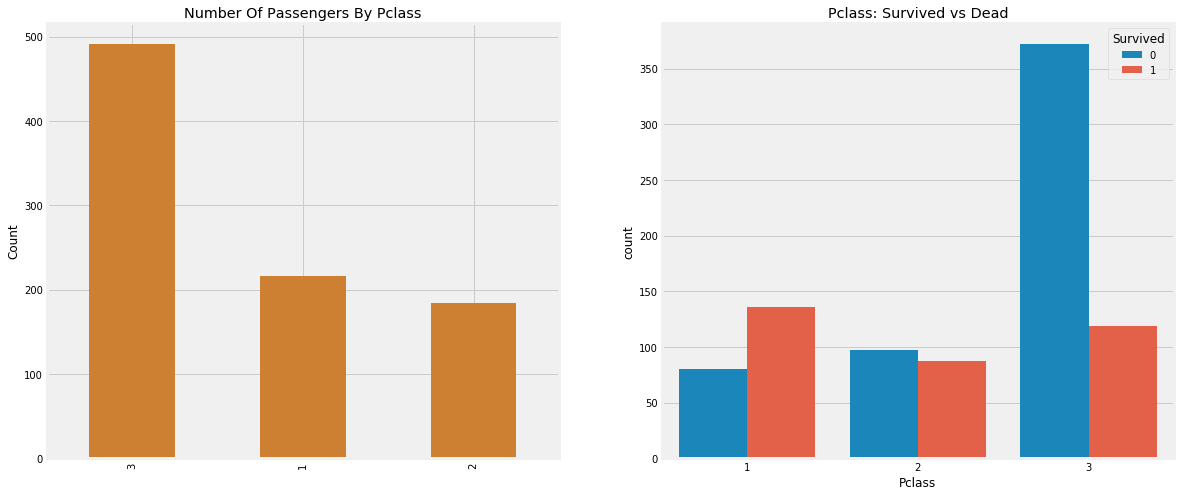

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passengers Of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of servival from them is very low, somewhere around **25%**.

For Pclass 1% survived is around **63%** while for Pclass 2 is around **48%**. So money and status matters. Such a materialistic world  

Let's Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

사람들은 **"돈으로 모든 것을 살 순 없다."**라고 말한다. 그러나 우리는 1등급의 승객들이 구조하는 것에 있어 매우 높은 우선순위를 가졌다는 것을 분명하게 알 수 있다. 3등급의 승객들의 수가 훨씬 더 많았음에도 불구하고, 그들의 생존율은 약 25%로 매우 낮았다.

1등급 승객의 경우 생존율은 약 63%이며, 2등급에 경우 약 48%이다. 그래서 돈과 지위가 중요하다. 이런 물질만능주의.

좀 더 자세히 살펴보고 다른 흥미로운 관찰 결과를 확인해보자. 성과 등급을 묶어서 생존율을 확인해보자.

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

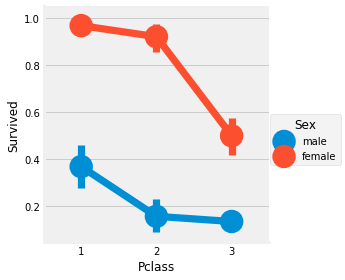

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

We use FactorPlot in this case, because they make the seperation of categorical values easy.

Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that servival for **Women from Pclass1** is about **95~96%**, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low servival rate.

Looks like Pclass is also an important feature. Let's analyse other features.

이런 경우에는 FactorPlot을 사용한다. 왜냐하면 이 차트는 범주형 값의 분리가 용이하기 때문이다.

**CrossTab**과 **FatorPlot**을 보면, 1등급의 여성 94명 중 3명만이 사망했기 때문에 1등급 여성의 생존율은 약 **95~96%**라고 쉽게 추론할 수 있다.

승객의 등급에 상관 없이, 여성은 구조에 대한 우선권을 가졌다는 것을 알 수 있다. 남성은 1등급 조차도 생존율이 매우 낮기 때문이다.

Pclass도 중요한 특성인 것 같다. 다른 특징들을 분석하자.

### Age --> Continous Feature
### 나이 --> 연속적 특성

In [12]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


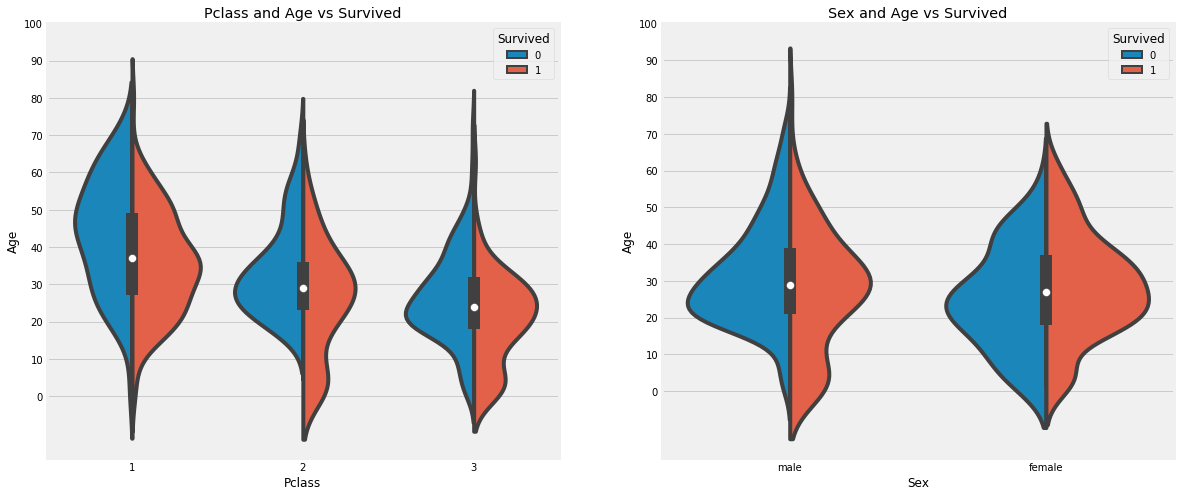

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

**Observations:**  
1)The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.  

2)Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.  

3)For males, the survival chances decreases with an increase in age.


As we had seen earlier, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.  

But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

**Bingo!!!**, we can check the **Name** feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.  

**"What's In A Name??"** ---> **Feature** :p

**관찰 결과:**  
1)Pclass에 따라 어린이 수가 증가하고, 10세 미만 승객(즉, 어린이)의 생존율은 Pclass에 관계없이 양호해 보인다.  

2)1등급부터 20-50세 승객의 생존 가능성은 높고 여성의 경우 더욱 높다.

3)남성의 경우 나이가 많아지면 생존 확률이 줄어든다.

앞서 살펴본 바와 같이, 나이 특성은 **177**개의 null 값을 가지고 있다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 할당할 수 있다.

그런데 문제는 나이 차이가 많이 나는 사람들이 많다는 것이다. 4살 아이 29살의 평균 연령으로 배정하면 안된다. 승객의 연령대에 대한 거짓말을 알 수 있는 방법이 있는가?

**빙고!!!**, **이름** 특성을 확인할 수 있다. 그 특성을 보면, 우리는 그 이름들이 앞에 Mr. 또는 Mrs.를 가지는 것을 알 수 있다. 따라서 우리는 각 그룹에 Mr.와 Mrs.의 평균 값을 할당할 수 있다.

**"이름이 뭘 나타내지??"** --> **특성** :p

In [14]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

Okay so here we are using the Regex: **[A-Za-z]+).**. So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. So we successfully extract the Initials from the Name.

여기에선 정규 표현식:**[A-Za-z]+).**을 사용한다. 그렇게 알파벳 문자들 사이에 있는 **.(점)**을 찾는다. 우리는 이름에서 .(점) 앞 문자들을 추출하는데 성공했다.

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')
#Checking the Initials with the Sex 성에 따른 이니셜을 체크한다.

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

Miss를 나타내는 Mlle이나 Mme같은 철자가 틀린 이니셜이 있다. 그것들을 Miss.와 other 값으로 교체할 것이다.

In [16]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [18]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 35
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [19]:
data.Age.isnull().any() # So no null values left finally

False

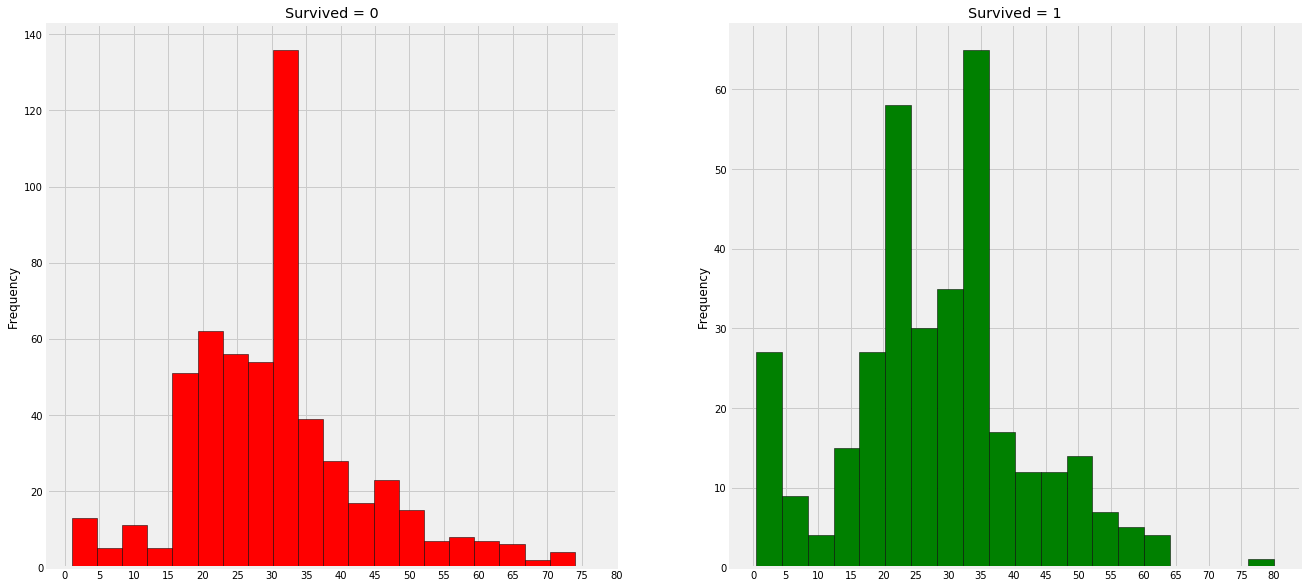

In [20]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

#### Observations:  
1)The Toddlers(age<5) were saved in large numbers(the Women and child First Policy). 
  
2)The oldest Passenger was saved(80 years).  

3)Maximum number of deaths were in the age group of 30-40

#### 관찰 결과:
1)5세 미만의 아기는 대다수가 살아남았다.(구조 최우선순위는 여성과 아이다.)  

2)가장 나이가 많은 승객(80세)이 살아남았다.  

3)30-40대가 가장 많이 죽은 그룹이다.

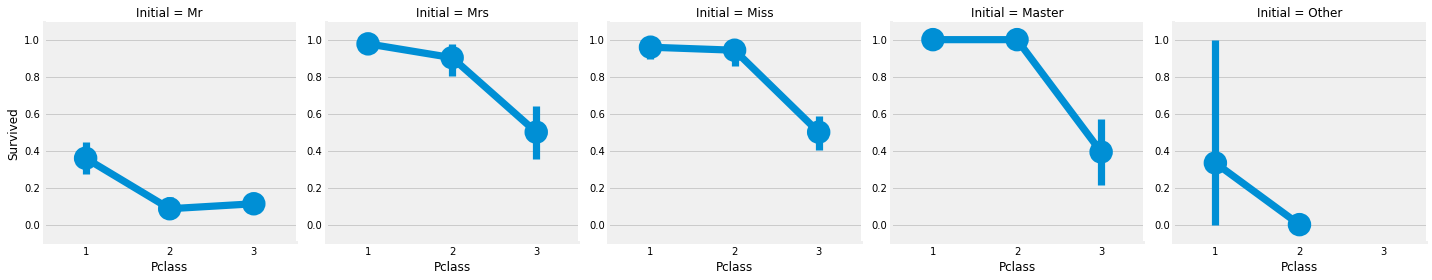

In [21]:
sns.factorplot('Pclass', 'Survived', col='Initial', data = data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.  
여성과 아이의 구조 우선순위는 등급에 상관없이 높다는 것이 사실이다.

### Embarked --> Categorical Value
### 착수 --> 범주형 값

In [22]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port Of Embarkation
#### 항만별 생존 가능성

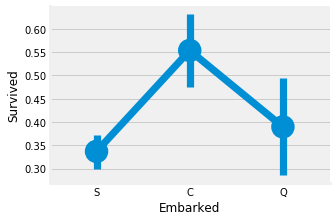

In [23]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.  
C 항만의 생존율은 약 0.55로 가장 높은 반면, S 항만은 가장 낮다.

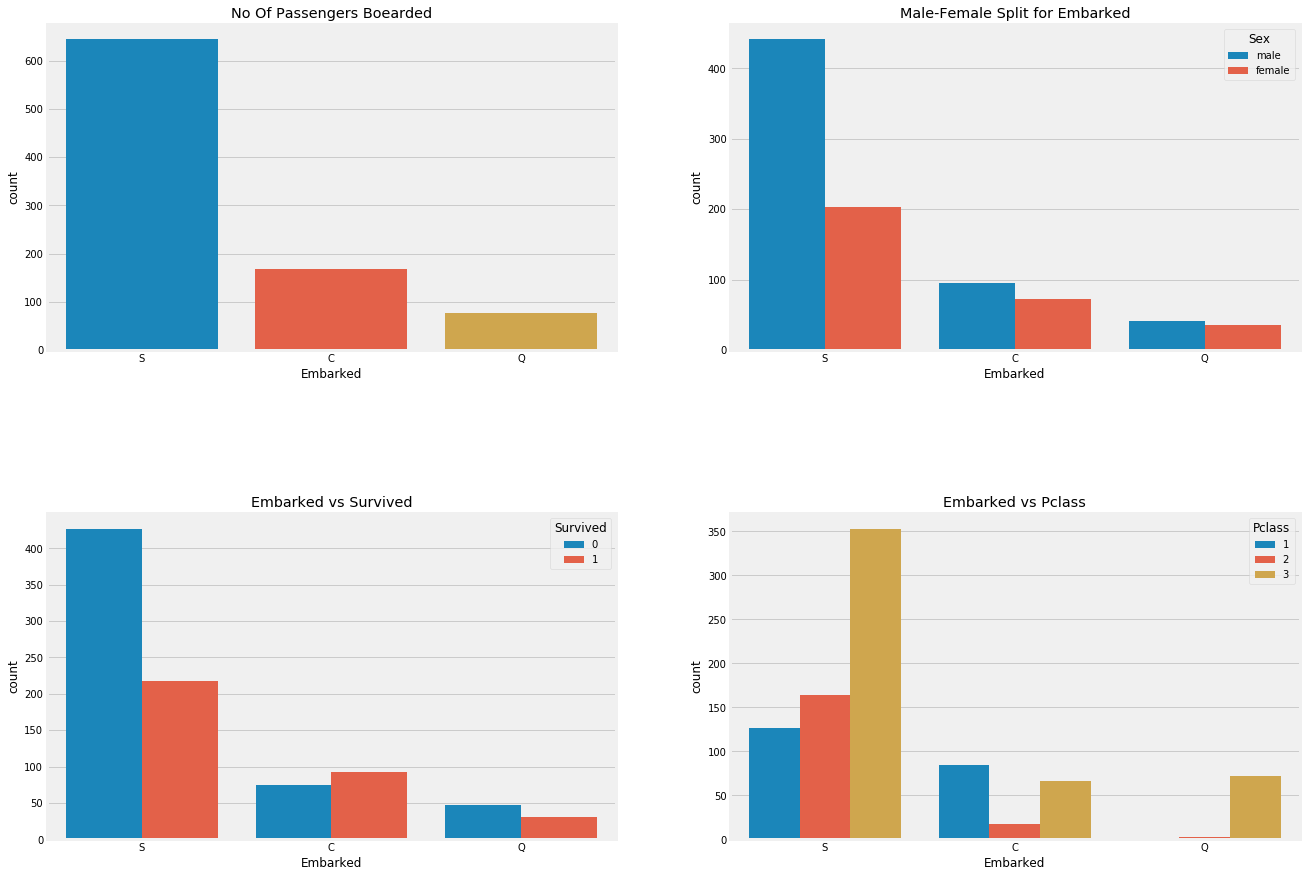

In [24]:
f, ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No Of Passengers Boearded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Observations:  
1)Maximum passengers boarded from S. Majority of them being from Pclass3.  

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.  

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around **81%** didn't survive.  

4)Port Q had almost 95% of the passengers were from Pclass3.

#### 관찰 결과:  
1)가장 많은 승객이 탑승한 곳이 S이며, 그들 중 대부분이 3등급이다.  

2)C에서 탑승한 승객들의 상당 수가 살아남은 것은 운이 좋은 것처럼 보인다. 그러나 그것은 아마도 1, 2등급의 승객들에 대한 구조의 우선순위와 관련되어 보인다.  

3)S는 대다수의 부자들이 탑승한 항구다. 그러나 생존율은 낮은데, 이는 많은 승객이 **81%**가 사망한 3등급의 승객들이기 때문이다.  

4)항만 Q에서 승선한 승객의 약 95%는 3등급이다.

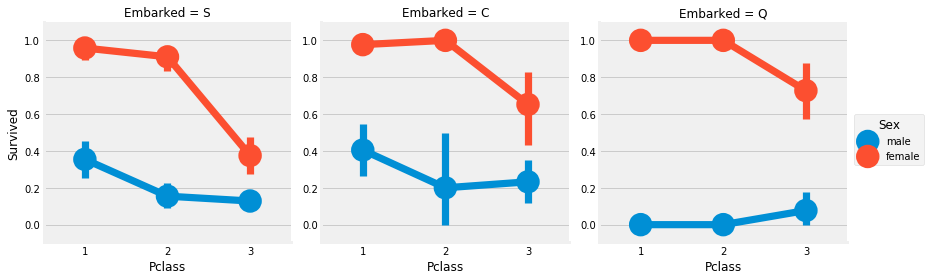

In [25]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

#### Observation:  
1)The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass  

2)Port S looks to be very unlucky for Pclass3 Passengers as the survival rate for both men and women is very low.**(Money Matters)**  

3)Port Q looks to be unluckiest for Men, as almost all were from Pclass 3.

#### 관찰 결과:  

!)등급에 관계없이 1등급과 2등급의 경우 생존율이 거의 1에 가깝다.  

2)항만 S의 3등급 탑승객의 남여 생존율이 매우 낮기 때문에 매우 불행해 보인다.

3)항만 Q는 남성들이 가장 불행해보이는데, 거의 모두가 3등급이기 때문이다.

### Filling Embarked NaN
### 착수 NaN 값 채우기
As we saw that maximum passengers boarded from Port S. we replace NaN with S.  
S항만에서 가장 많은 승객이 탑승했음을 알기에 NaN을 S값으로 대체한다.

In [26]:
data['Embarked'].fillna('S', inplace=True)

In [27]:
data.Embarked.isnull().any() # Finally No NaN values

False

### SibSip --> Discrete Feature
This feature represents wheather a person is alone or with his family members.  

Sibling = brother, sister, stepbrother, stepsister  

Spouse = husband, wife

### SibSip --> 이산형 특성
이 특성은 혼자 또는 가족과 함께 있는 사람을 나타낸다.  

Sibling = 형제, 자매, 의붓형제, 의붓자매  

Spouse = 남편, 아내

In [28]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


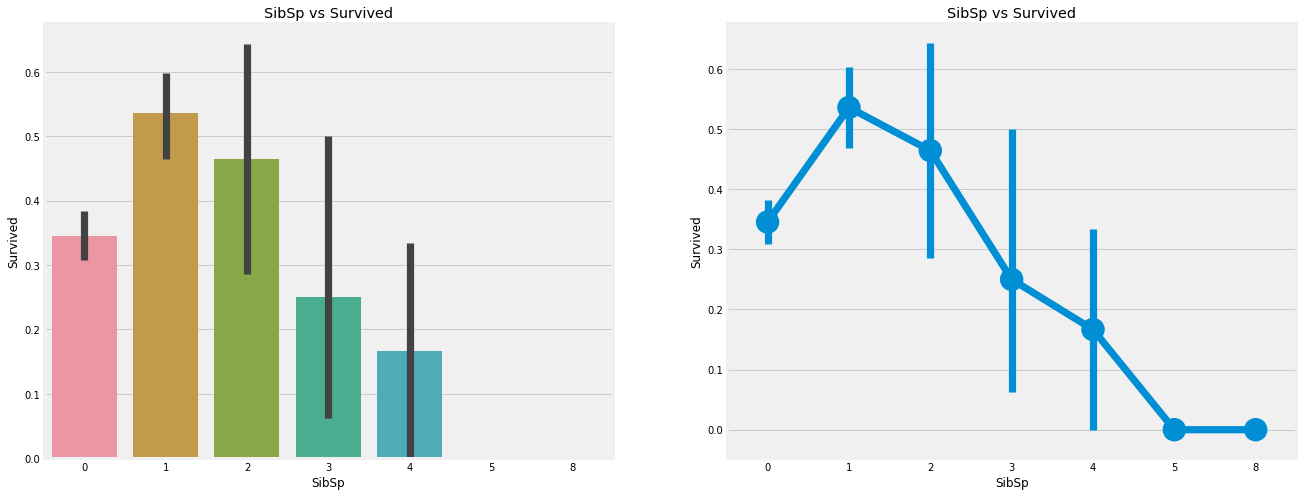

In [29]:
f, ax = plt.subplots(1,2,figsize=(20, 8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [30]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### Observations:
The barplot and factorplot shows that if a passenger is alone on board with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is **0%**. The reason may be Pclass??  

The reason is **Pclass**. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

#### 관찰 결과:
두 개의 그래프는 승객이 혼자 배에 탄 경우 생존율이 34.5%에 이른다는 것을 보여준다. 또한 함께 탄 인원이 늘어날수록 생존율은 줄어든다는 것을 보여준다. 만일 내게 함께 탄 가족이 있다면 나는 내가 사는 것 대신에 그들을 살리기에 더욱 노력했을 것이다. 그리고 놀랍게도 가족이 5-8명인 경우에는 생존율이 0%이다. 0%인 이유는 등급때문일까?

그렇다. 표는 함께 탑승한 인원이 3명이 초과되는 경우는 모두 3등급에 속한다는 것을 보여준다. 그리고 그렇게 많은 인원들이 있는 가족(3등급)은 모두 죽었다.

### Parch
### 부모 + 자식

In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.  
이 표는 3등급에 더 큰 가족들이 있다는 것을 보여준다.

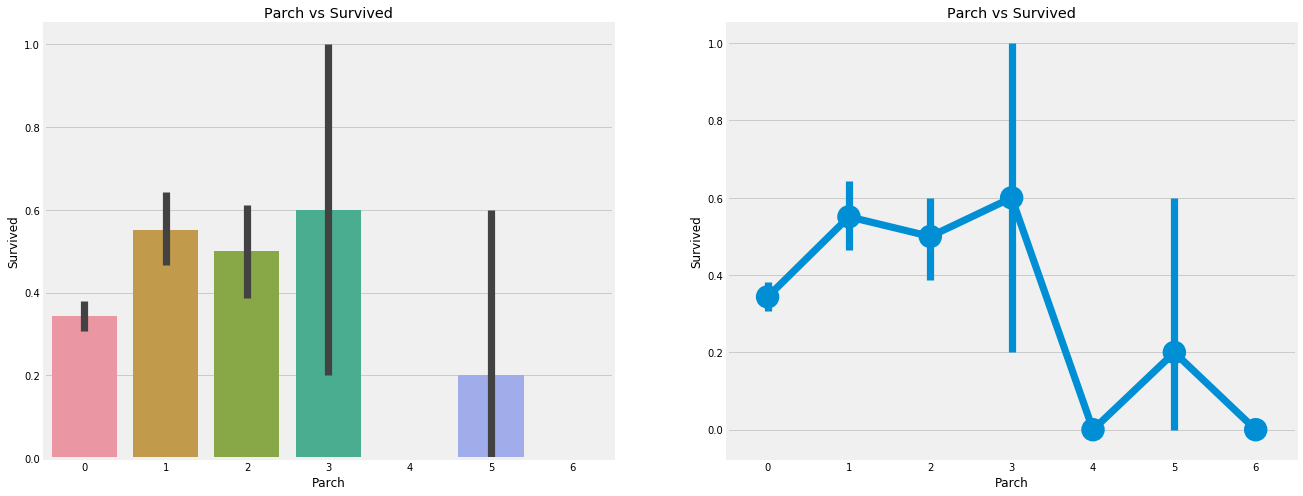

In [32]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

#### Observations:
Here too the results are quite similar. Passengers with their paremts on board have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

#### 관찰 결과:
여기에서도 결과는 상당히 비슷하다. 부모를 태운 승객은 생존 가능성이 더 높다. 그러나 숫자가 증가함에 따라 감소한다.

생존 가능성은 1-3명의 부모를 가진 사람에게 좋다. 혼자라는 것 또한 치명적이며 누군가가 배 안에 4명 이상의 부모를 가지고 있을 때 생존 가능성이 줄어든다는 것을 증명한다.

### Fare --> Continous Feature
### 요금 --> 연속적 특성

In [33]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare 0.0. Wow! a free luxorious ride.  
최저 요금은 0이다. 럭셔리한 무료 호화선~

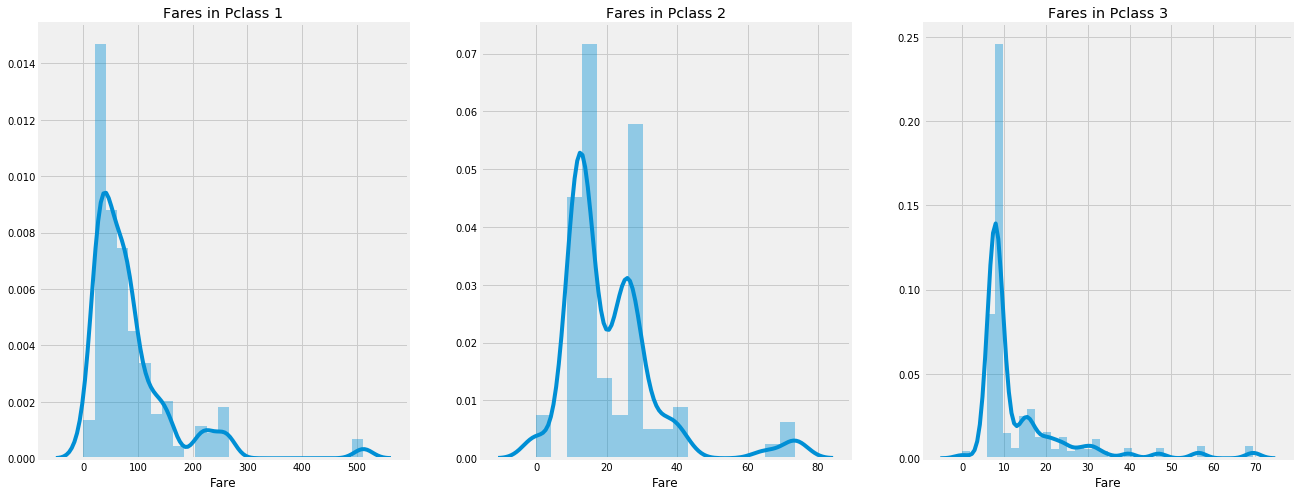

In [34]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There looks to be a large distibution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

1등급 승객 요금에는 많은 분배가 있을 것으로 보이며, 이 분배는 기준이 줄어들면서 계속 감소하고 있다. 이것 또한 연속적이기 때문에, 우리는 쓰레기통을 사용해 불연속적인 값으로 변환할 수 있다.

### Observations in a Netshell for all features:
**Sex**: The chance of survivial for women is high as compared to men.

**Pclass**: There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass3 is very low**. For **women**, the chance of survival from **Pclass1** is almost 1 and is high too for those from **Pclass2**.**Money Wins!!!.**

**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked**: This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass1 passenger got up at S**. Passengers at Q were all from **Pclass3**.

**Parch+SibSp**: Having 1-2 siblings, spouse on board or 1-3 Parents shows a greater chance of probability rather than being alone or having a large family traveling with you.

### 모든 특성에 대한 복합적인 관찰 결과:
**성**: 남성과 비교해 여성의 생존율이 높다.

**등급**: 1등급 승객에게 생존 기회(생존율)이 많이 주어지는 뚜렷한 추세가 있다는 것을 볼 수 있다. **3등급 승객들의 생존율은 매우 낮다.** 여성의 경우 1등급인 경우에는 생존율이 거의 100%이며, 2등급의 경우도 매우 높다. 역시 자본의 승리

**나이**: 5-10세 미만의 아이들의 경우 생존율이 매우 높다. 15-35세 사이에 속한 승객들은 많이 죽었다.

**항만**: 이것은 엄청 흥미로운 특성이다. 1등급 승객들은 대부분 S에서 탔음에도 불구하고 C에서 탄 사람들의 생존율이 더 높아 보인다. Q에서 탑승한 승객들은 모두 3등급이다.

**가족**: 형제,자매나 배우자가 1-2명 함께 탑승하거나 1-3명의 부모,자식이 함께 탑승한 것은 혼자 탔거나 대가족과 함께 탄 것보다 더 높은 생존율을 보인다.

### Correlation Between The Features
### 특성들 사이의 연관성

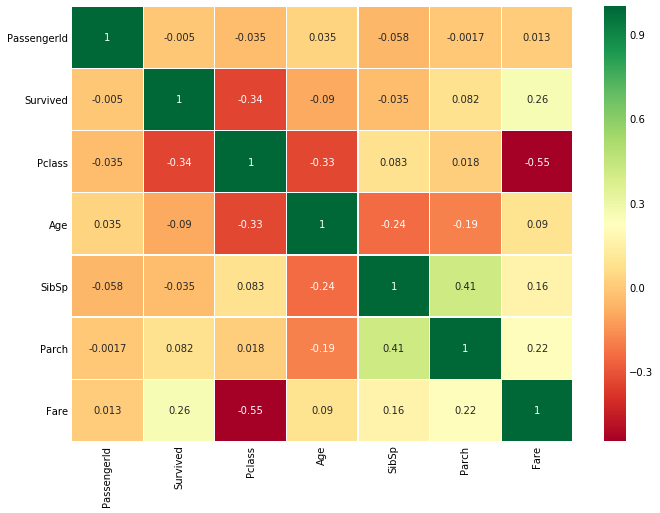

In [35]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### Interpreting The Heatmap
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**POSITIVE CORRELATION:** If an **increase in feature A leads to increase in feature B, then they are positively correlated.** A value **1 means perfect positive correlation**.

**NEGATIVE CORRELATION:** If an **increase in feature A leads to decrease in feature B, then they are negatively correlated.** A value **-1 means perfect negative correlation**.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity** as both of them contains almost the same information.

So do you think we should use both of them as **one of them is redundant**. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap, we can see that the features are not much correlated. The highest correnlation is between **SibSp and Parch i.e 0.41**. So we can carry on with all features.

#### 열지도 해석
첫 번째로 주목할 것은 알파벳이나 문자열 사이에 연관성이 있을 수 없다는 것이 명백하기 때문에 숫자로 된 특성만 비교가 된다는 점이다. 그림을 이해하기 전에, 어떤 연관성이 있는지 보자.

**양적 연관성:** 만일 특성 A가 증가할 때, 특성 B도 따라서 증가하면, 그 특성들 사이에는 양적인 연관성이 있다는 것을 의미한다. 값이 1인 것은 완벽한 양적 연관성을 가진다는 것을 의미한다.

**음적 연관성:** 만일 특성 A가 증가할 때, 특성 B가 감소하면, 그 특성들 사이에는 음적 연관성이 있다는 것을 의미한다. 값이 -1인 것은 완벅한 음적 연관성을 가진다는 것을 의미한다.

두 특성이 높은 혹은 완벽하게 연관성이 있기 때문에 하나가 증가하면 다른 하나도 따라서 증가한다고 하자. 이것은 두 특성이 매우 유사한 정보를 포함하고 있으며, 정보의 차이가 거의 없거나 전혀 없다는 것을 의미한다. 이 두 특성은 거의 동일한 정보를 포함하고 있기 때문에 **다중공선성**이라고 알려져 있다.

그래서 그 중 하나는 불필요한 것이기 때문에 둘 다 사용할 필요가 없다. 중복된 특성들을 제거하기 위해 노력한다면, 모델을 만들거나 훈련시킬 때 훈련 시간 감소와 많은 이점들이 있다.

위의 열지도로부터 특성들간에 많은 연관성이 없다는 것을 알 수 있다. 가장 높은 연관성을 보이는 것이 **형제,자매와 부모,자식** 사이로 **0.41**이라고 나타낸다. 그래서 우리는 모든 특성들로 계속할 수 있다.